In [1]:
import torch

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download the results in CASF for different training:

#### Results for NodeEdgeGNN, 5 seeds 3 processor 128, usual

In [6]:
results_1 = torch.load("../../results/placid-elk-736")
results_2 = torch.load("../../results/respected-finch-308")
results_3 = torch.load("../../results/bold-skunk-509")
results_4 = torch.load("../../results/crawling-shad-989")
results_5 = torch.load("../../results/learned-boar-983")

Results for NodeEdgeGNN, 5 seeds 3 processor 128, test for holdout2019

In [3]:
results_1 = torch.load("../../resultsholdout2019/placid-elk-736")
results_2 = torch.load("../../resultsholdout2019/respected-finch-308")
results_3 = torch.load("../../resultsholdout2019/bold-skunk-509")
results_4 = torch.load("../../resultsholdout2019/crawling-shad-989")
results_5 = torch.load("../../resultsholdout2019/learned-boar-983")

Results for NodeEdgeGNN, 5 seeds 3 processor 128 for CASF (without weight decay or dropout)

In [2]:
results_1 = torch.load("../../results/orderly-worm-516")
results_2 = torch.load("../../results/sassy-vole-612")
results_3 = torch.load("../../results/honorable-pig-916")
results_4 = torch.load("../../results/invincible-zebra-803")
results_5 = torch.load("../../results/legendary-auk-611")

#### Results for NodeEdgeGNN, 5 seeds, 3 processors, 128 size, trained on refined 2016

In [8]:
results_1 = torch.load("../../results/dashing-ram-127")
results_2 = torch.load("../../results/charming-worm-552")
results_3 = torch.load("../../results/redolent-ram-6")
results_4 = torch.load("../../results/glamorous-asp-389")
results_5 = torch.load("../../results/masked-robin-647")

#### Results for NodeEdgeGNN, 5 seeds, 3 processors, 128 size, trained on general 2020

In [19]:
results_1 = torch.load("../../results/skittish-crane-3")
results_2 = torch.load("../../results/honorable-croc-497")
results_3 = torch.load("../../results/bustling-chimp-364")
results_4 = torch.load("../../results/silent-goat-509")
results_5 = torch.load("../../results/shivering-calf-793")

#### Results for NodeEdgeGNN, 5 seeds, 3 processors, 128 size, trained on refined 2020

In [27]:
results_1 = torch.load("../../results/debonair-cat-137")
results_2 = torch.load("../../results/popular-cow-666")
results_3 = torch.load("../../results/omniscient-moose-46")
results_4 = torch.load("../../results/mysterious-dove-943")
results_5 = torch.load("../../results/overjoyed-deer-222")

## Aggregate all results

In [3]:
results = torch.stack([results_1, results_2, results_3, results_4, results_5]).mean(dim=0)

## Or consider the results other sanity checks

### Aggregating edges, nodes or both

In [13]:
# results = torch.load("../../results/silent-bird-525") # only edges
# results = torch.load("../../results/charming-newt-715") # only nodes
results = torch.load("../../results/placid-elk-736") # both

### Aggregating with sum or mean

In [15]:
# results = torch.load("../../results/placid-elk-736")
results = torch.load("../../results/peaceful-hen-601")

#### No dropout or weight decay

In [14]:
results = torch.load("../../results/orderly-worm-516")

## Running Results

In [4]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Example input tensor
input_tensor = results

# Calculate MAE, MSE, RMSE
differences = input_tensor[:, 0] - input_tensor[:, 1]
mae = torch.mean(torch.abs(differences))
mse = torch.mean(differences**2)
rmse = torch.sqrt(mse)

# Calculate Pearson correlation
pearson_corr, _ = pearsonr(input_tensor[:, 0], input_tensor[:, 1])

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(input_tensor[:, 0], input_tensor[:, 1])

# Calculate standard deviation
std_deviation = torch.std(differences)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")

MAE: 0.9201
MSE: 1.4254
RMSE: 1.1939
Pearson Correlation: 0.8500
Spearman Correlation: 0.8394
Standard Deviation: 1.1938


all predictions

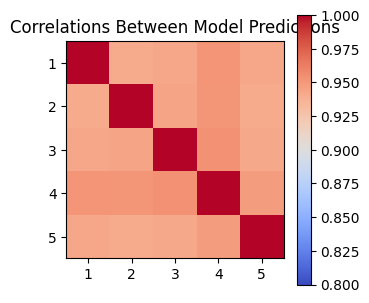

Model 1 Root Mean Squared Error: 1.25
Model 1 Pearson Correlation: 0.83
Model 2 Root Mean Squared Error: 1.21
Model 2 Pearson Correlation: 0.84
Model 3 Root Mean Squared Error: 1.26
Model 3 Pearson Correlation: 0.83
Model 4 Root Mean Squared Error: 1.24
Model 4 Pearson Correlation: 0.83
Model 5 Root Mean Squared Error: 1.23
Model 5 Pearson Correlation: 0.83


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Sample predictions (torch.Tensor vectors)
model1_predictions = results_1[:, 0]
model2_predictions = results_2[:, 0]
model3_predictions = results_3[:, 0]
model4_predictions = results_4[:, 0]
model5_predictions = results_5[:, 0]

# Create a list of model predictions
model_predictions = [model1_predictions, model2_predictions, model3_predictions, model4_predictions, model5_predictions]

# Calculate correlations between model predictions
correlations = np.corrcoef([p.numpy() for p in model_predictions])

# Visualize correlations as a heatmap
plt.figure(figsize=(3.5, 3.5))
plt.imshow(correlations, cmap='coolwarm', vmin=0.8, vmax=1)
plt.colorbar()
plt.title('Correlations Between Model Predictions')
plt.xticks(range(len(model_predictions)), range(1, len(model_predictions) + 1))
plt.yticks(range(len(model_predictions)), range(1, len(model_predictions) + 1))
plt.show()

# Scatter plots
# for i in range(len(model_predictions)):
#     for j in range(i + 1, len(model_predictions)):
#         plt.figure(figsize=(6, 4))
#         plt.scatter(model_predictions[i].numpy(), model_predictions[j].numpy())
#         plt.xlabel(f'Model {i + 1} Predictions')
#         plt.ylabel(f'Model {j + 1} Predictions')
#         plt.title(f'Scatter Plot: Model {i + 1} vs Model {j + 1}')
#         plt.show()

# # Calculate descriptive statistics
# for i, predictions in enumerate(model_predictions):
#     mean = torch.mean(predictions)
#     median = torch.median(predictions)
#     std_dev = torch.std(predictions)
#     range_min = torch.min(predictions)
#     range_max = torch.max(predictions)
#     print(f"Model {i + 1} Statistics:")
#     print(f"  Mean: {mean:.2f}")
#     print(f"  Median: {median:.2f}")
#     print(f"  Standard Deviation: {std_dev:.2f}")
#     print(f"  Range (Min, Max): ({range_min:.2f}, {range_max:.2f})")

# Error analysis (e.g., Mean Absolute Error)
true_values = results_1[:, 1] # True target values
for i, predictions in enumerate(model_predictions):
    error = torch.mean((predictions - true_values)**2)
    root_mean_squared_error = torch.sqrt(error)
    # pearson correlation
    pearson_corr, _ = pearsonr(predictions, true_values)
    print(f"Model {i + 1} Root Mean Squared Error: {root_mean_squared_error:.2f}")
    print(f"Model {i + 1} Pearson Correlation: {pearson_corr:.2f}")

# Plots

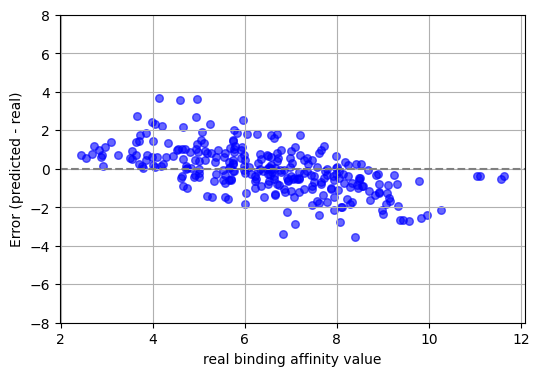

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Example input tensor
input_tensor = results

# Compute differences and means
differences = input_tensor[:, 0] - input_tensor[:, 1]
means = 0.5 * (input_tensor[:, 0] + input_tensor[:, 1])

# Create the Bland-Altman plot
plt.figure(figsize=(6, 4))
plt.scatter(means, differences, c='blue', marker='o', s=30, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylim(-8, 8)
#plt.title("Bland-Altman plot")
plt.xlabel("real binding affinity value")
plt.ylabel("Error (predicted - real)")
plt.grid(True)
plt.show()


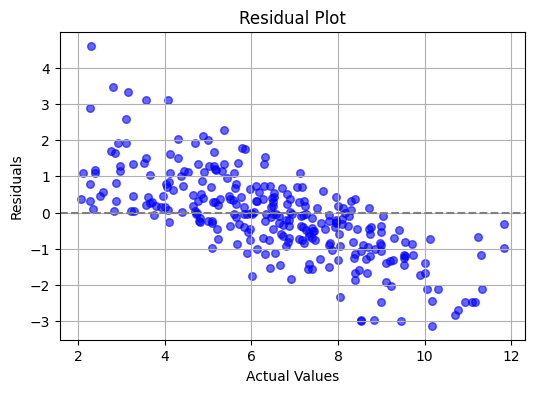

In [12]:
residuals = input_tensor[:, 0] - input_tensor[:, 1]
plt.figure(figsize=(6, 4))
plt.scatter(input_tensor[:, 1], residuals, c='blue', marker='o', s=30, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

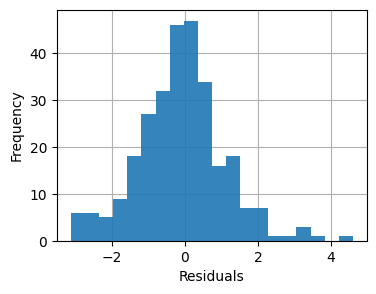

In [28]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.hist(residuals, bins=20, color='tab:blue', alpha=0.9)
# ax.set_title("Histogram of Residuals")
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")
ax.grid(True)
ax.set_axisbelow(True)
plt.show()

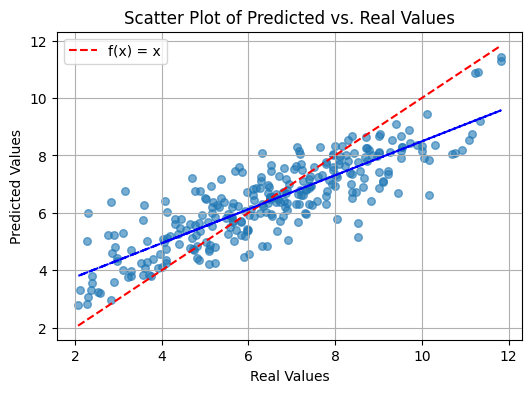

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(input_tensor[:, 1], input_tensor[:, 0], c='tab:blue', marker='o', s=30, alpha=0.6)
plt.plot([min(input_tensor[:, 1]), max(input_tensor[:, 1])], 
         [min(input_tensor[:, 1]), max(input_tensor[:, 1])], color='red', linestyle='--', label='f(x) = x')
plt.title("Scatter Plot of Predicted vs. Real Values")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)

z = np.polyfit(input_tensor[:, 1], input_tensor[:, 0], 1)
p = np.poly1d(z)
plt.plot(input_tensor[:, 1], p(input_tensor[:, 1]), "b--", label="fitted line")

# plt.axis_below(True)
plt.show()